In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [5]:
df= pd.read_csv("./datasets/pima_diabetes.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

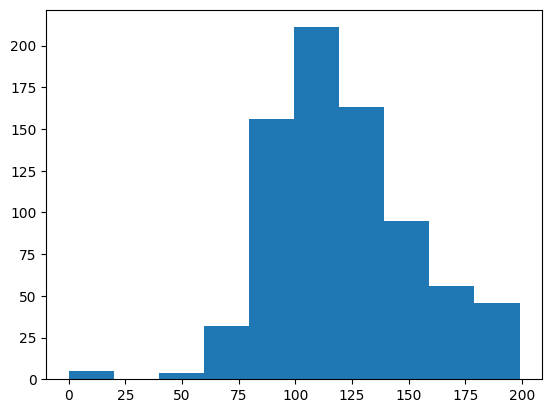

In [10]:
plt.hist(df['Glucose'], bins = 10)

In [22]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]
y = df['Outcome']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [36]:
X_train

array([[ 0.25977903, -3.78077929,  0.61677038, -0.69205168,  1.03974028],
       [ 0.25977903,  0.89724451, -0.03210586,  1.63307692,  0.40945373],
       [-1.85825286,  0.67966201,  0.48699513, -0.69205168,  0.31753694],
       ...,
       [-0.61235174,  0.89724451,  1.07098374, -0.69205168,  1.78820556],
       [ 0.63354937, -3.78077929, -1.32985833, -0.69205168,  1.36801453],
       [ 0.13518892,  1.44120077, -1.32985833, -0.69205168, -1.24504846]])

In [24]:
X_df = pd.DataFrame(X, columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'])

In [26]:
X_df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00
25%,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01
50%,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04
75%,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01
max,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([-3.78365371, -3.16084052, -2.53802733, -1.91521414, -1.29240095,
        -0.66958775, -0.04677456,  0.57603863,  1.19885182,  1.82166501,
         2.44447821]),
 <BarContainer object of 10 artists>)

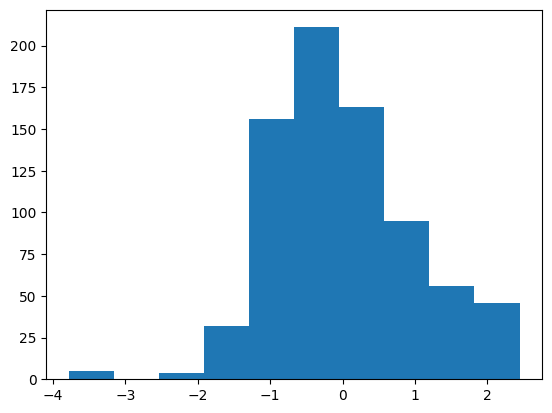

In [29]:
plt.hist(X_df['Glucose'], bins = 10)

In [69]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=3 ,random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state=42)

In [70]:
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

In [71]:
dt_pred_proba = dt.predict_proba(X_test)

In [72]:
dt_pred_proba

array([[1.        , 0.        ],
       [0.65957447, 0.34042553],
       [0.65957447, 0.34042553],
       [0.97368421, 0.02631579],
       [0.41818182, 0.58181818],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.65957447, 0.34042553],
       [1.        , 0.        ],
       [0.61538462, 0.38461538],
       [0.76190476, 0.23809524],
       [0.05660377, 0.94339623],
       [0.61538462, 0.38461538],
       [0.91025641, 0.08974359],
       [1.        , 0.        ],
       [0.65957447, 0.34042553],
       [0.91025641, 0.08974359],
       [0.91025641, 0.08974359],
       [0.05660377, 0.94339623],
       [0.41818182, 0.58181818],
       [0.91025641, 0.08974359],
       [0.91025641, 0.08974359],
       [0.91025641, 0.08974359],
       [0.91025641, 0.08974359],
       [0.41818182, 0.58181818],
       [0.05660377, 0.94339623],
       [0.97368421, 0.02631579],
       [1.        , 0.        ],
       [0.6875    , 0.3125    ],
       [0.91025641, 0.08974359],
       [0.

In [73]:
fpr , tpr , threshosd = roc_curve(y_test, dt_pred_proba[: , 1] )

In [74]:
dt = DecisionTreeClassifier(max_depth=7, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [75]:
dt_pred_proba_1 = dt.predict_proba(X_test)

In [76]:
fpr_1 , tpr_1 , threshosd_1 = roc_curve(y_test, dt_pred_proba_1[: , 1] )

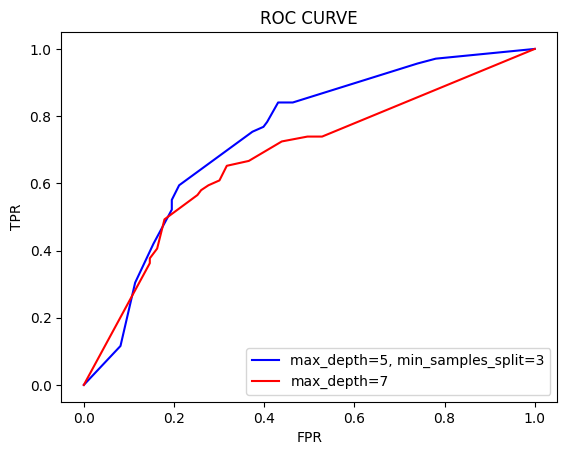

In [77]:
plt.title("ROC CURVE")

plt.xlabel("FPR")
plt.ylabel("TPR")

plt.plot(fpr, tpr, "b", label = "max_depth=5, min_samples_split=3")
plt.plot(fpr_1, tpr_1, "r", label = "max_depth=7")



plt.legend(loc = "lower right")

plt.show()

In [78]:
auc = roc_auc_score(y_test, dt_pred_proba[:,1])
auc_1 = roc_auc_score(y_test, dt_pred_proba_1[:,1])

In [79]:
auc

0.7401908801696713

In [80]:
auc_1

0.6767998114763756